In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from skimage.color import rgb2hsv
from sklearn.model_selection import train_test_split
from keras.layers import SpatialDropout2D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle as pkl

Using TensorFlow backend.


In [2]:
os.getcwd()

'C:\\Users\\abels\\Desktop\\crowd_count'

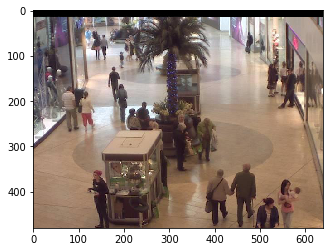

In [3]:
# Load the image
pic_ = plt.imread(r'C:\Users\abels\Desktop\crowd_count\crowd-counting\frames\frames\seq_000001.jpg')

# Display the image
plt.imshow(pic_)
plt.show()

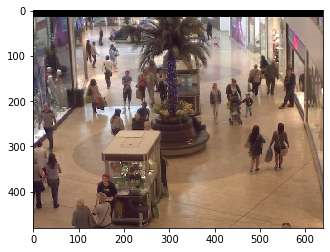

In [4]:
# Load the image
pic_ = plt.imread(r'C:\Users\abels\Desktop\crowd_count\crowd-counting\frames\frames\seq_000002.jpg')

# Display the image
plt.imshow(pic_)
plt.show()

In [5]:
targ_ = np.load(r'C:\Users\abels\Desktop\crowd_count\crowd-counting\labels\labels.npy')

In [6]:
test_targ = np.zeros((2000,54))

In [7]:
max(list(targ_))

array([53], dtype=uint8)

In [8]:
min(list(targ_))

array([13], dtype=uint8)

In [9]:
max_ = max(list(targ_))

In [10]:
for x in range(0,len(targ_)):
    test_targ[x][targ_[x]] = 1

In [11]:
images_ = np.load(r'C:\Users\abels\Desktop\crowd_count\crowd-counting\frames\np_frames\images.npy')

In [12]:
max_targ = max(targ_)[0]
print (max_targ)

53


In [13]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

#convert to HSV - choose one of the channels

In [14]:
#gray_img = rgb2gray(images_[:,:,:,0])

In [15]:
images_.shape

(2000, 480, 640, 3)

In [16]:
test123 = rgb2hsv(images_[0])

In [17]:
test123.shape

(480, 640, 3)

In [18]:
print (rgb2hsv(images_[0])[2])

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [19]:
for x in range(0,5):
    test123[x] = rgb2hsv(images_[x])[2]

In [20]:
images_.shape

(2000, 480, 640, 3)

In [21]:
test123 = np.zeros(shape=(2000,480,640,3), dtype = int)

In [22]:
#2000, 480, 640
test123.shape

(2000, 480, 640, 3)

In [23]:
import cv2

In [24]:
hsv_img = cv2.cvtColor(images_[0], cv2.COLOR_BGR2HSV)

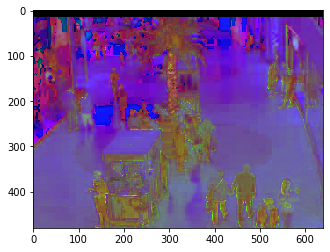

In [25]:
plt.imshow(hsv_img)
plt.show()

In [26]:
hsv_img.shape

(480, 640, 3)

In [27]:
%%time
for x in range(0,len(images_)):
    test123[x] = cv2.cvtColor(images_[x], cv2.COLOR_BGR2HSV)

Wall time: 37.9 s


In [28]:
test123[0] = cv2.cvtColor(images_[0], cv2.COLOR_BGR2HSV)

In [29]:
#%%time
#for x in range(0,len(images_)):
#    test123[x] = rgb2hsv(images_[x]).round(6)

In [30]:
test123[0].shape

(480, 640, 3)

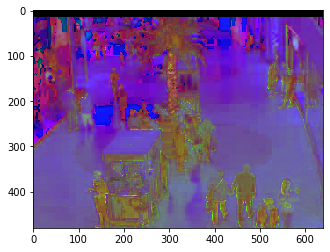

In [31]:
plt.imshow(test123[0])
plt.show()

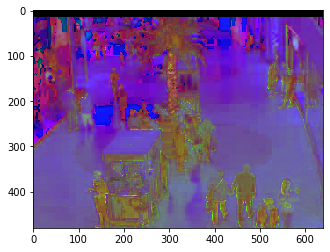

In [32]:
plt.imshow(test123[0])
plt.show()

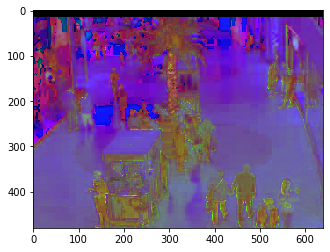

In [33]:
plt.imshow(cv2.cvtColor(images_[0], cv2.COLOR_BGR2HSV))
plt.show()

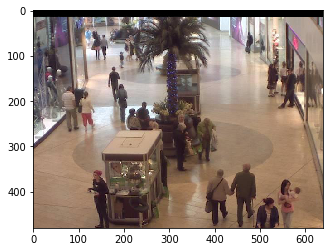

In [34]:
plt.imshow(images_[0])
plt.show()

In [35]:
test123.shape

(2000, 480, 640, 3)

In [36]:
print("%d bytes" % (test123.size * test123.itemsize))

7372800000 bytes


In [37]:
#np.save('hvs_data.npy', test123)

In [38]:
test123.shape

(2000, 480, 640, 3)

In [39]:
test123[:,:,:,2].size

614400000

In [40]:
inputlayer_ = test123[:,:,:,2]

In [41]:
inputlayer_.size

614400000

In [42]:
#np.save('hvs_data.npy', inputlayer_)

In [43]:
inputlayer_.shape

(2000, 480, 640)

In [44]:
#for x in range(0,len(images_)):
    #test123[x] = rgb2hsv(images_[x])

In [45]:
#testhsv = np.array([rgb2hsv(xi) for xi in images_])

In [46]:
#gray_img = np.array([rgb2gray(xi) for xi in images_])

In [47]:
IMG_SIZE = images_.shape[1]
IMG_SIZE2 = images_.shape[2]

In [1]:
model = Sequential()

#model.add(BatchNormalization())
#add batch normalization prior to convolution
#add dropout for the dense layer

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE2, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size = (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size = (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(228, kernel_size = (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size = (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(SpatialDropout2D(0.2))

model.add(Conv2D(128, kernel_size = (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024, activation = 'linear'))

model.add(Dense(512, activation = 'linear'))

#keras.layers.LeakyReLU(alpha=0.3

model.add(Dropout(0.2))

#model.add(Dropout(0.3))

model.add(Dense(54, activation = 'softmax'))

NameError: name 'Sequential' is not defined

In [49]:
model.compile(optimizer='ADAM',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
#from keras.optimizers import SGD
#opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 478, 638, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 239, 319, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 238, 318, 128)     16512     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 119, 159, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 118, 158, 128)     65664     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 59, 79, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 58, 78, 228)      

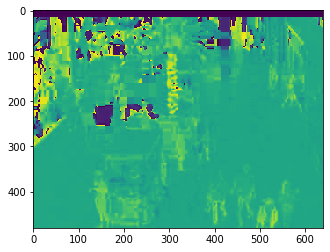

In [52]:
plt.imshow(test123[:,:,:,0][0])
plt.show()

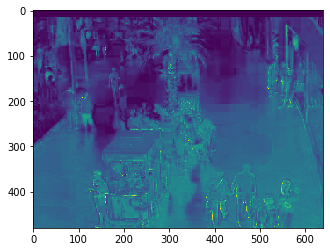

In [53]:
plt.imshow(test123[:,:,:,1][0])
plt.show()

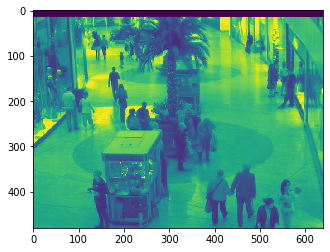

In [54]:
plt.imshow(test123[:,:,:,2][0])
plt.show()

In [55]:
inputlayer_ = test123[:,:,:,2]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(inputlayer_[0:50], test_targ[0:50], test_size=0.2, random_state=42)

In [58]:
X_train = np.expand_dims(X_train, axis=4)
X_test = np.expand_dims(X_test, axis=4)

C:\Users\abels\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.
C:\Users\abels\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [59]:
def data_Generator3():  
    for i in range(0,len(X_train) // 32):
        yield  X_train[i*32:(i+1)*32], y_train[i*32:(i+1)*32]

In [60]:
def data_Generator():  
    for i in range(0,len(X_train) // 32):
        yield  X_train[0:33], y_train[0:33]

In [61]:
def data_Generator2():  
    while True:
        for i in range(0,len(X_train) // 32):
            yield  X_train[i*32:(i+1)*32], y_train[i*32:(i+1)*32]

In [62]:
X_train.shape

(40, 480, 640, 1)

In [63]:
test_targ[0].shape

(54,)

In [64]:
asdf = data_Generator2()

In [65]:
testu = data_Generator()

In [66]:
X_train.size

12288000

In [67]:
y_train.shape

(40, 54)

In [68]:
y_test.shape

(10, 54)

In [77]:
#model.fit(asdf[0], asdf[1], batch_size=10, epochs=20, verbose=1)

In [78]:
model.fit_generator(data_Generator2(), steps_per_epoch=2, epochs=10, verbose=1)

Epoch 1/10
2/2 [==============================] - 54s 27s/step - loss: 103.6293 - accuracy: 0.0781
Epoch 2/10
2/2 [==============================] - 63s 31s/step - loss: 35.0174 - accuracy: 0.0625
Epoch 3/10
2/2 [==============================] - 52s 26s/step - loss: 18.7789 - accuracy: 0.0312
Epoch 4/10
2/2 [==============================] - 53s 27s/step - loss: 15.5348 - accuracy: 0.0312
Epoch 5/10
2/2 [==============================] - 52s 26s/step - loss: 8.5462 - accuracy: 0.0156
Epoch 6/10
2/2 [==============================] - 52s 26s/step - loss: 4.2827 - accuracy: 0.0625
Epoch 7/10
2/2 [==============================] - 51s 25s/step - loss: 4.2530 - accuracy: 0.0469
Epoch 8/10
2/2 [==============================] - 48s 24s/step - loss: 7.2917 - accuracy: 0.0156
Epoch 9/10
2/2 [==============================] - 49s 24s/step - loss: 8.1733 - accuracy: 0.1094
Epoch 10/10
2/2 [==============================] - 47s 24s/step - loss: 4.8005 - accuracy: 0.0312


In [ ]:


#Look into Keras stop when the loss function is not decreasing
#Save model after running

#2000 - 1600 training / 400 testing
#8000 with transformations - add noise (45 degree rotation)
